In [1]:
import h5py
import numpy 
import pylab as mplot
%pylab inline
import astropy.io.fits as pf

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


We need to make a few files:
* photometry_catalog_desy1_masked.h5
* lens_tomography_catalog.hdf5

In [2]:
RM_des = pf.open('../inputs/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits')
print(RM_des[1].header.keys)

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   48 / width of table in bytes                        
NAXIS2  =               653691 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
TTYPE1  = 'ID      '           / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'RA      '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            

In [5]:
with h5py.File('../inputs/photometry_catalog_desy1_RM.h5', 'w') as f:

    f.create_group("provenance")
    f.create_group("photometry")

    f['photometry/ra'] = RM_des[1].data['RA']
    f['photometry/dec'] = RM_des[1].data['DEC']
    f['photometry/redshift_true'] = RM_des[1].data['ZREDMAGIC']
    
    N = len(RM_des[1].data)
    f['photometry/extendedness'] = np.ones(N)*0
    f['photometry/mag_u'] = np.ones(N)*20
    f['photometry/mag_err_u'] = np.ones(N)
    f['photometry/mag_g'] = np.ones(N)*20
    f['photometry/mag_err_g'] = np.ones(N)
    f['photometry/mag_r'] = np.ones(N)*20
    f['photometry/mag_err_r'] = np.ones(N)
    f['photometry/mag_i'] = np.ones(N)*20
    f['photometry/mag_err_i'] = np.ones(N)
    f['photometry/mag_z'] = np.ones(N)*20
    f['photometry/mag_err_z'] = np.ones(N)
    f['photometry/mag_y'] = np.ones(N)*20
    f['photometry/mag_err_y'] = np.ones(N)
    f['photometry/id'] = RM_des[1].data['ID']
    f['photometry/shear_1'] = np.ones(N)*0
    f['photometry/shear_2'] = np.ones(N)*0
    f['photometry/size_true'] = np.ones(N)
    f['photometry/snr_u'] = np.ones(N)*20
    f['photometry/snr_g'] = np.ones(N)*20
    f['photometry/snr_r'] = np.ones(N)*20
    f['photometry/snr_i'] = np.ones(N)*20
    f['photometry/snr_z'] = np.ones(N)*20
    f['photometry/snr_y'] = np.ones(N)*20
    
    f['photometry/mag_i'][100:200] = 9.0
    # add one bright object
    

<KeysViewHDF5 ['photometry', 'provenance']>
<KeysViewHDF5 ['dec', 'extendedness', 'id', 'mag_err_g', 'mag_err_i', 'mag_err_r', 'mag_err_u', 'mag_err_y', 'mag_err_z', 'mag_g', 'mag_i', 'mag_r', 'mag_u', 'mag_y', 'mag_z', 'ra', 'redshift_true', 'shear_1', 'shear_2', 'size_true', 'snr_g', 'snr_i', 'snr_r', 'snr_u', 'snr_y', 'snr_z']>


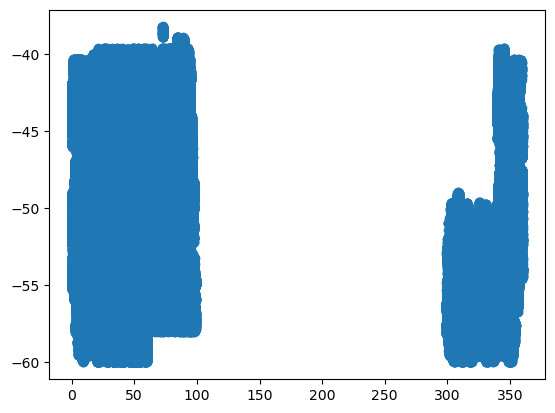

In [10]:
with h5py.File('../inputs/photometry_catalog_desy1_RM.h5') as f:
    print(f.keys())
    print(f['photometry'].keys())
    mplot.scatter(np.array(f['photometry/ra']),np.array(f['photometry/dec']))


In [25]:
with h5py.File('../inputs/lens_tomography_catalog.hdf5') as f:
    # print(dir(f))
    print(dict(f['tomography'].attrs))


{'lens_zbin_edges': array([0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 ]), 'nbin_lens': 5}


In [27]:
with h5py.File('../inputs/lens_tomography_catalog_desy1_RM.h5', 'w') as f:

    f.create_group("provenance")
    f.create_group("tomography")

    z = RM_des[1].data['ZREDMAGIC']
    tomo_array = np.zeros(len(z)) - 1
    tomo_array[(z>=0.15)*(z<0.3)] = 0
    tomo_array[(z>=0.3)*(z<0.45)] = 1
    tomo_array[(z>=0.45)*(z<0.6)] = 2
    tomo_array[(z>=0.6)*(z<0.75)] = 3
    tomo_array[(z>=0.75)*(z<0.9)] = 4
    
    f['tomography/lens_bin'] = tomo_array.copy()
    f['tomography/lens_counts'] = np.array([len(tomo_array[tomo_array==0]),len(tomo_array[tomo_array==1]),len(tomo_array[tomo_array==2]),len(tomo_array[tomo_array==3]),len(tomo_array[tomo_array==4])])
    f['tomography/lens_counts_2d'] = [len(tomo_array[tomo_array>=0])]
    f['tomography/lens_weight'] = RM_des[1].data['weight']   
    
    f['tomography'].attrs['lens_zbin_edges'] = np.array([0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 ])
    f['tomography'].attrs['nbin_lens'] = 5

